In [1]:
import json
import pandas as pd

jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [1]:
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [2]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos occasionally you realize someone you thought was a dear friend is actually a foe , their true character finally revealed . but how do you forgive the unforgivable ? here are my 10 steps to handling betrayal with elegance and grace .",0
"xxbos xxunk leonard , modern prose master , noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words , unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1
"xxbos ' how do we treat the little people , joan ? ' i asked . and she said , ' why , we treat them better . we only s -- t on people at our level or higher . '",0
xxbos ' new york times ' moves all content you wo n't give a shit about unless you make at least $ xxunk a year into one convenient section,1


In [4]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.2, callback_fns=ShowGraph)
learn.load_encoder('learn-stage2-enc')

#Stage-1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


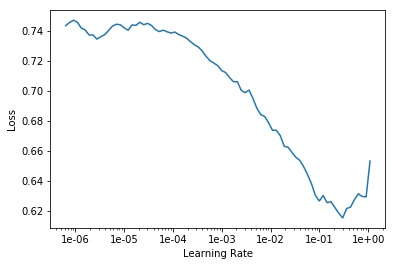

In [5]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.429368,0.382200,0.825785,00:11
1,0.416506,0.379635,0.826912,00:11
2,0.410657,0.361642,0.835181,00:11
3,0.393529,0.361241,0.839692,00:10
4,0.394097,0.363090,0.836685,00:11
5,0.399587,0.362569,0.835933,00:11
6,0.390751,0.357467,0.838752,00:11
7,0.401364,0.381215,0.831047,00:11
8,0.391499,0.356060,0.842323,00:11
9,0.410347,0.361824,0.834993,00:10


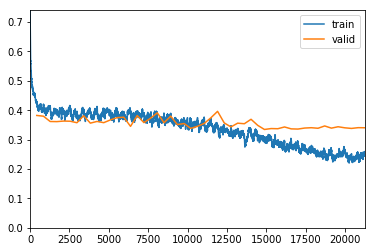

Better model found at epoch 0 with valid_loss value: 0.38219961524009705.
Better model found at epoch 1 with valid_loss value: 0.379635214805603.
Better model found at epoch 2 with valid_loss value: 0.3616422116756439.
Better model found at epoch 3 with valid_loss value: 0.36124059557914734.
Better model found at epoch 6 with valid_loss value: 0.3574674725532532.
Better model found at epoch 8 with valid_loss value: 0.3560602068901062.
Better model found at epoch 14 with valid_loss value: 0.34507328271865845.
Better model found at epoch 23 with valid_loss value: 0.3382759392261505.
Better model found at epoch 34 with valid_loss value: 0.334502249956131.


In [6]:
learn.fit_one_cycle(50, 2e-2, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [7]:
learn.save("learn-clas-stage1")
learn.save_encoder("learn-clas-stage1-enc")

#Stage-2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


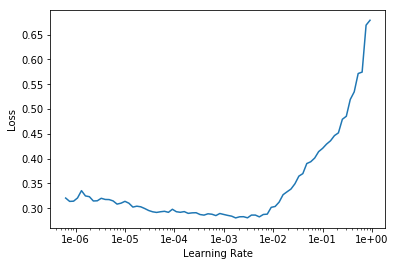

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.238567,0.298193,0.872580,00:32
1,0.222331,0.277285,0.883293,00:33
2,0.194815,0.257127,0.894005,00:32
3,0.145425,0.244147,0.904717,00:32
4,0.110196,0.246631,0.908476,00:33
5,0.074778,0.259430,0.908476,00:33
6,0.070054,0.290344,0.907160,00:32
7,0.072078,0.297977,0.909040,00:33
8,0.059592,0.307641,0.903590,00:33


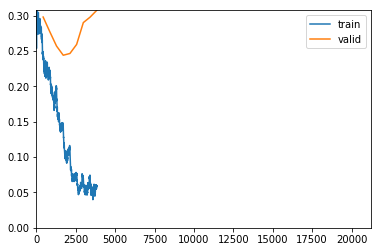

Better model found at epoch 0 with valid_loss value: 0.2981932759284973.
Better model found at epoch 1 with valid_loss value: 0.27728500962257385.
Better model found at epoch 2 with valid_loss value: 0.2571265697479248.
Better model found at epoch 3 with valid_loss value: 0.24414747953414917.


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

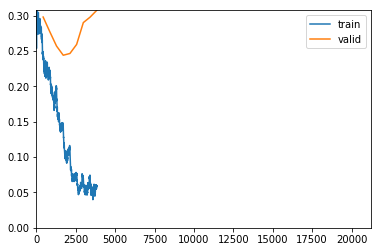

In [9]:
learn.fit_one_cycle(50, 1e-3, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [10]:
learn.save("learn-clas-stage2")
learn.save_encoder("learn-clas-stage2-enc")

#Stage-3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


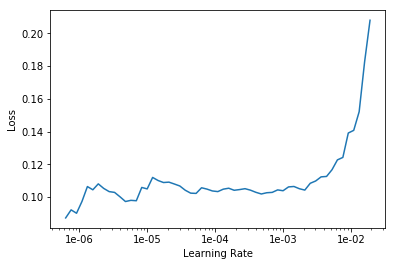

In [11]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.095924,0.238340,0.906033,00:32
1,0.092742,0.238232,0.911295,00:33
2,0.082836,0.237712,0.910919,00:33
3,0.064689,0.243228,0.909979,00:32
4,0.053444,0.242869,0.912986,00:32
5,0.041207,0.257956,0.912986,00:33
6,0.031430,0.253504,0.915241,00:33
7,0.024782,0.270454,0.912798,00:33
8,0.021954,0.255595,0.915429,00:33
9,0.027813,0.258187,0.915241,00:33


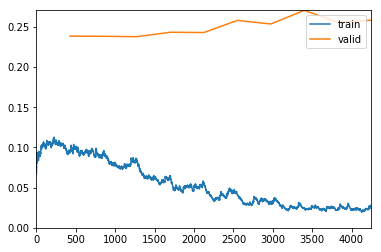

Better model found at epoch 0 with valid_loss value: 0.23833993077278137.
Better model found at epoch 1 with valid_loss value: 0.23823153972625732.
Better model found at epoch 2 with valid_loss value: 0.23771150410175323.


In [13]:
learn.fit_one_cycle(10, 1e-4, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [14]:
learn.save("learn-clas-stage3")
learn.save_encoder("learn-clas-stage3-enc")

In [15]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")

(Category 1, tensor(1), tensor([0.0232, 0.9768]))

In [16]:
learn.save_encoder("0.2-drop-enc-no-headline-lm")